# Predicting closing values using twitter sentiment score
# Creating datasets

In [2]:
import pandas as pd
tw_stock=pd.read_pickle('processed_data/a_tw_stock.pkl')

In [4]:
y=tw_stock.close.values

X contains sentiment score and Y contains closing values

In [6]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
y = y.astype('float32')
y = np.reshape(y, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
y = scaler.fit_transform(y)

In [9]:
X=tw_stock.SentimentScore.values
X = X.astype('float32')
X = np.reshape(X, (-1, 1))
X=scaler.fit_transform(X)

In [10]:
split=0.7
tr_size=int(len(y)*split)
tst_size=len(y)-tr_size

In [12]:
train_y, test_y = y[0:tr_size,:], y[tr_size:len(y),:]
train_x, test_x = X[0:tr_size,:], X[tr_size:len(X),:]

In [76]:
train_y.shape,train_x.shape

((1000, 1), (1000, 1))

In [22]:
def dataset_creation(data,days=1):
    x,y=[],[]
    for i in range(len(data)-days-1):
        a = data[i:(i+days), 0]
        x.append(a)
        y.append(data[i + days, 0])
    return np.array(x), np.array(y)

In [23]:
#creating features for sentiments and closing values
X_train_features_2, auxiliar_1 = dataset_creation(train_x)
X_test_features_2, auxiliar_2 = dataset_creation(test_x)

In [24]:
X_train_features_1, y_train = dataset_creation(train_y)
X_test_features_1, y_test = dataset_creation(test_y)

In [25]:
#reshaping
X_train_features_1 = np.reshape(X_train_features_1, (X_train_features_1.shape[0], 1, X_train_features_1.shape[1]))
X_test_features_1  = np.reshape(X_test_features_1, (X_test_features_1.shape[0], 1, X_test_features_1.shape[1]))
X_train_features_2 = np.reshape(X_train_features_2, (X_train_features_2.shape[0], 1, X_train_features_2.shape[1]))
X_test_features_2  = np.reshape(X_test_features_2, (X_test_features_2.shape[0], 1, X_test_features_2.shape[1]))

In [26]:
X_train_all_features = np.append(X_train_features_1,X_train_features_2,axis=1)
X_test_all_features = np.append(X_test_features_1,X_test_features_2,axis=1)

# LSTM Modelling ignore

In [31]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
model = Sequential()
model.add(LSTM(200, input_shape=(X_train_all_features.shape[1], X_train_all_features.shape[2])))
model.add(Dropout(0.20))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

modelo=model.fit(X_train_all_features,y_train,epochs=20,validation_data=(X_test_all_features, y_test))

model.summary()

Epoch 1/20
32/32 [==============================] - 2s 22ms/step - loss: 0.0337 - val_loss: 0.0227
Epoch 2/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0092 - val_loss: 0.0085
Epoch 3/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0024 - val_loss: 4.7200e-04
Epoch 4/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 2.8332e-04
Epoch 5/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0016 - val_loss: 9.8776e-04
Epoch 6/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 4.7705e-04
Epoch 7/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 1.9097e-04
Epoch 8/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 2.6094e-04
Epoch 9/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 5.9054e-04
Epoch 10/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0014 - val_los

In [32]:
train_predict = model.predict(X_train_all_features)
test_predict  = model.predict(X_test_all_features)

In [42]:
time_y_train = pd.DataFrame(data = train_y, index = tw_stock[0:tr_size].index,columns= [""])
time_y_test  = pd.DataFrame(data = test_y, index = tw_stock[tr_size:].index,columns= [""])

In [46]:
time_y_train.head(10)

,
date,
2017-01-03,0.021836
2017-01-04,0.022441
2017-01-05,0.023265
2017-01-06,0.026035
2017-01-07,0.026862
2017-01-09,0.028909
2017-01-10,0.029794
2017-01-11,0.030346
2017-01-12,0.029857


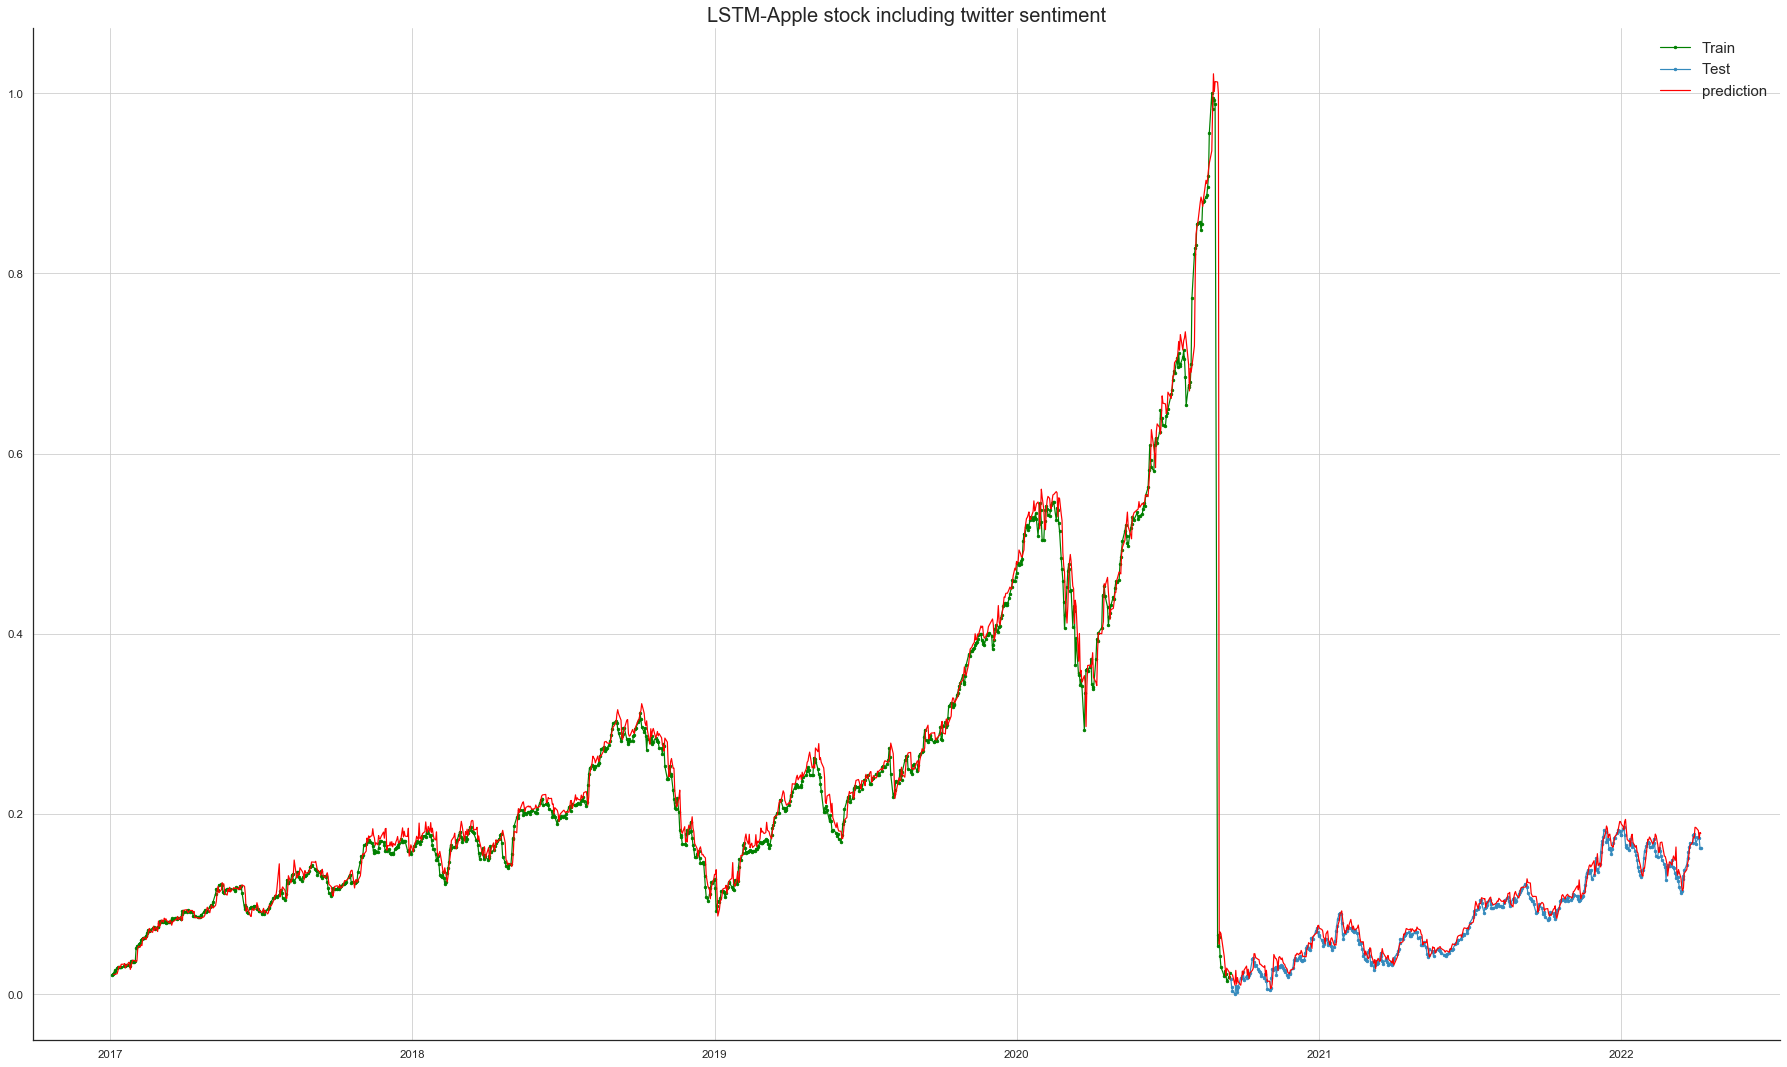

In [68]:
import matplotlib.pyplot  as plt
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('dark')

time_y_train_prediction = pd.DataFrame(data = train_predict, index = time_y_train[2:].index,columns= [""])
time_y_test_prediction  = pd.DataFrame(data = test_predict, index = time_y_test[2:].index,columns= [""])


plt.style.use('seaborn-ticks')
plt.figure(figsize=(25,15))

plt.plot(time_y_train,label = "Train",color ="green",marker='.')
plt.plot(time_y_test,label = "Test",marker='.')
plt.plot(time_y_train_prediction,color="red",label = "prediction")
plt.plot(time_y_test_prediction,color="red")
plt.title("LSTM-Apple stock including twitter sentiment",size = 20)
plt.tight_layout()
sns.despine(top=True)
plt.ylabel('', size=15)
plt.xlabel('', size=15)
plt.legend(fontsize=15)
plt.grid()

plt.show();

In [124]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('Test Mean Absolute Error:', mean_absolute_error(np.reshape(y_test,(y_test.shape[0],1)), test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(np.reshape(y_test,(y_test.shape[0],1)), test_predict[:,0])))

ValueError: Found input variables with inconsistent numbers of samples: [429, 428]

In [70]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.2 MB/s eta 0:00:0000:0100:010m
Note: you may need to restart the kernel to use updated packages.


In [97]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=300)
xgb_model.fit(train_x,train_y)
# xg_pred = xgb_model.predict(test_y)

In [98]:
# print('Root Mean Squared Error:', np.sqrt(mean_squared_error(test_y, xg_pred)))

Root Mean Squared Error: 0.19038291


# AdaBoost ignore

In [93]:
pip install ada-boost

Note: you may need to restart the kernel to use updated packages.


In [100]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
ada_model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300)
ada_model.fit(train_x,train_y)
# ada_predict=ada_model.predict(test_y)

/Users/keerthiseetha/villanova/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [102]:
# print('Root Mean Squared Error:', np.sqrt(mean_squared_error(test_y, ada_predict)))

Root Mean Squared Error: 0.22559177785521783


# XGBoost new

In [104]:
tw_stock.head()

,open,close,NextClose,Label,SentimentScore,C-O
date,,,,,,
2017-01-03,115.834667,115.834380,116.075720,1,0.097646,0
2017-01-04,116.080000,116.075720,116.404615,1,0.088151,0
2017-01-05,116.358146,116.404615,117.509957,1,0.084029,1
2017-01-06,117.415657,117.509957,117.840000,1,0.051908,1
2017-01-07,117.890000,117.840000,118.656853,1,0.083957,0


In [105]:
tw_stock.columns

Index(['open', 'close', 'NextClose', 'Label', 'SentimentScore', 'C-O'], dtype='object')

In [112]:
def boost_data(df, window, col_number1, col_number2, col_number3, target_col_number):
    
    X_close = []
    X_co = []
    X_sentimentscore = []
    y = []
    for i in range(len(df) - window):
        
        close = df.iloc[i:(i + window), col_number1]
        co = df.iloc[i:(i + window), col_number2]
        sentimentscore = df.iloc[i:(i + window), col_number3]
        target = df.iloc[(i + window), target_col_number]
        
        # Append values in the lists
        X_co.append(co)
        X_sentimentscore.append(sentimentscore)
        y.append(target)
        
    return np.hstack((X_close,X_co,X_sentimentscore)), np.array(y).reshape(-1, 1)

In [113]:
window=3
col1=1 #closing price
col2=5 #c-o 
col3=4 #sentiment score
target_col=1
X,y=boost_data(tw_stock,window,col1,col2,col3,target_col)

In [114]:
xsplit=int(0.7*len(X))
ysplit=int(0.7*len(y))

X_train=X[:xsplit]
X_test=X[xsplit:]
y_train=y[:ysplit]
y_test=y[ysplit:]

In [115]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
y_train=scaler.fit_transform(y_train)
y_test=scaler.fit_transform(y_test)

In [116]:
xgb_model.fit(X_train,y_train.ravel())
xpred=xgb_model.predict(X_test)

In [121]:
print('RMSE XGBoost:', np.sqrt(mean_squared_error(y_test, xpred)))

RMSE XGBoost: 0.0980752418291129


# AdaBoost new

In [119]:
ada_model.fit(X_train,y_train.ravel())
a_pred=ada_model.predict(X_test)

In [122]:
print('RMSE of AdaBosot:', np.sqrt(mean_squared_error(y_test, a_pred)))

RMSE of AdaBosot: 0.07439415418763867


# LSTM new

In [130]:
#new model with window =3
# 3 layeredLSTM
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
model=Sequential()
model.add(LSTM(units=9,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.20))
# model.add(LSTM(units=9,return_sequences=True))
# model.add(Dropput(0.20))
# model.add(LSTM(units=9))
# model.add(Dropout(0.20))
model.add(Dense(1))

model.compile(optimizer="adam",loss="mean_squared_error")
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 9)                 396       
                                                                 
 dropout_8 (Dropout)         (None, 9)                 0         
                                                                 
 dense_4 (Dense)             (None, 1)                 10        
                                                                 
Total params: 406
Trainable params: 406
Non-trainable params: 0
_________________________________________________________________


In [131]:
model.fit(X_train,y_train,epochs=10,batch_size=5)

Epoch 1/10
200/200 [==============================] - 3s 4ms/step - loss: 0.0359
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0241
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0162
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0109
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0086
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0090
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0083
Epoch 8/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0076
Epoch 9/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0078
Epoch 10/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0066


In [132]:
l_pred=model.predict(X_test)
print("RMSE OF LSTM :",np.sqrt(mean_squared_error(y_test, l_pred)))

RMSE OF LSTM : 0.1435336177461192
